# Multiple Regression

Simple Linear Regression:

$$y = \beta_0 + \beta_1X$$

Multiple Linear Regression:

$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...$$

Well studied field in statistics

Focus will be on what is relevant for Data Science - practical and relevant for prediction

Importamos las librerias a utilizar para un modelo de regresión lineal. 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

Verificamos versiones de las librerias. 

In [22]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

2.2.2
2.2.3
3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
1.6.1


Se manda llamar el dataset desde el repositorio local porque éste ya no se encuentra disponbile en la librería. 

In [23]:
df = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
df.head()

C:\Users\pepez\AppData\Local\Temp\ipykernel_5084\3040748044.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
df.shape

(506, 14)

Separamos las variables dependientes de las independientes

In [25]:
X = df.copy()
X.drop('MEDV', axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [28]:
y = pd.DataFrame(df['MEDV'].copy())

In [29]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# Statsmodels

Importamos las librerias de statsmodels

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We need to add a constant term to allow statsmodel.api to calculate the bias / intercepts.

$y = mX$

$y = mX + c$

Para crear la matriz que considere el coeficiente b0 agregamos una columna con la constante 1 en todos sus renglones.

In [31]:
X_constant = sm.add_constant(X)

In [32]:
pd.DataFrame(X_constant)

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


El sigiente instrucción nos da la ayuda de la librería OLS

In [35]:
sm.OLS?

Init signature: sm.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
Docstring:     
Ordinary Least Squares

Parameters
----------
endog : array_like
    A 1-d endogenous response variable. The dependent variable.
exog : array_like
    A nobs x k array where `nobs` is the number of observations and `k`
    is the number of regressors. An intercept is not included by default
    and should be added by the user. See
    :func:`statsmodels.tools.add_constant`.
missing : str
    Available options are 'none', 'drop', and 'raise'. If 'none', no nan
    checking is done. If 'drop', any observations with nans are dropped.
    If 'raise', an error is raised. Default is 'none'.
hasconst : None or bool
    Indicates whether the RHS includes a user-supplied constant. If True,
    a constant is not checked for and k_constant is set to 1 and all
    result statistics are calculated as if a constant is present. If
    False, a constant is not checked for and k_constant is set to 0.
**kwa

Generamos nuestro modelo.

In [36]:
model = sm.OLS(y, X_constant)

Ajustamos el modelo

In [37]:
lr = model.fit()

Y revisamos los valores que arroja dicho modelo. 

In [38]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.926e+30
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:19:53   Log-Likelihood:                 15140.
No. Observations:                 506   AIC:                        -3.025e+04
Df Residuals:                     491   BIC:                        -3.019e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.331e-14   2.81e-14     -1.184      0.237   -8.86e-14    2.19e-14
CRIM       -2.262e-16   1.74e-16     -1.298      0.195   -5.69e-16    1.16e-16
ZN         -2.776e-17   7.28e-17     -0.381      0.703   -1.71e-16    1.15e-16
INDUS      -2.992e-16   3.23e-16     -0.928      0.354   -9.33e-16    3.35e-16
CHAS        9.506e-16   4.56e-15      0.208      0.835   -8.02e-15    9.92e-15
NOX         3.786e-14   2.05e-14      1.849      0.065   -2.36e-15    7.81e-14
RM         -2.776e-15   2.37e-15     -1.171      0.242   -7.43e-15    1.88e-15
AGE        -7.373e-17   6.93e-17     -1.064      0.288    -2.1e-16    6.24e-17
DIS         7.078e-16    1.1e-15      0.642      0.521   -1.46e-15    2.87e-15
RAD        -5.326e-16   3.55e-16     -1.498      0.135   -1.23e-15    1.66e-16
TAX         5.757e-17   1.99e-17      2.888      0.004    1.84e-17    9.67e-17
PTRATIO    -1.069e-15   7.22e-16     -1.480      0.140   -2.49e-15     3.5e-16
B           1.744e-16   1.43e-17     12.229      0.000    1.46e-16    2.02e-16
LSTAT      -5.274e-16   2.94e-16     -1.797      0.073    -1.1e-15    4.93e-17
MEDV           1.0000   2.36e-16   4.23e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      273.641   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1307.129
Skew:                           2.512   Prob(JB):                    1.45e-284
Kurtosis:                       9.063   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are a lot of statistical tests and information. Mostly for the purpose of statistical analysis.

You do not need all of these for data science.

Data science focus is on prediction and having models that work on predicting real data. It is not concerned as much with  correct specifications of statistical problems.

## Model Statistical Outputs:

**Dep. Variable**: The dependent variable or target variable

**Model**: Highlight the model used to obtain this output. It is OLS here. Ordinary least squares / Linear regression

**Method**: The method used to fit the data to the model. Least squares

**No. Observations**: The number of observations

**DF Residuals**: The degrees of freedom of the residuals. Calculated by taking the number of observations less the number of parameters

**DF Model**: The number of estimated parameters in the model. In this case 13. The constant term is not included.


**R-squared**: This is the coefficient of determination. Measure of goodness of fit.
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

> From [wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination),

  > The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$

  > The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$

  > The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$

**Adj. R-squared**: This is the adjusted R-squared. It is the coefficient of determination adjusted by sample size and the number of parameters used.
$$\bar{R}^2=1-(1-R^2)\frac{n-1}{n-p-1}$$

> $p$ = The total number of explanatory variables not including the constant term

> $n$ = The sample size

**F-statistic**: A measure that tells you if you model is different from a simple average.

**Prob (F-statistic)**: This measures the significance of your F-statistic. Also called p-value of F-statistic. In statistics, p-value equal or lower than 0.05 is considered significant.

**AIC**: This is the Akaike Information Criterion. It evaluatess the model based on the model complexity and number of observations. The lower the better. 

**BIC**: This is the Bayesian Information Criterion. Similar to AIC, except it pushishes models with more parameters.

## Parameters Estimates and the Associated Statistical Tests

**coef**: The estimated coefficient. Note that this is just a point estimate.

**std err**: The standard error of the estimate of the coefficient. Another term for standard deviation

**t**: The t-statistic score. 

**P > |t|**: The p-value. A measure of the probability that the coefficient is different from zero.

**[95.0% Conf. Interval]**: The 95% confidence interval of the coefficient. Shown here as [0.025, 0.975], the lower and upper bound.

## Residual Tests

**Omnibus D'Angostino's test**: This is a combined statistical test for skewness and kurtosis.

**Prob(Omnibus)**: p-value of Omnibus test.

**Skewness**: This is a measure of the symmetry of the residuals around the mean. Zero if symmetrical. A positive value indicates a long tail to the right; a negative value a long tail to the left.

**Kurtosis**: This is a measure of the shape of the distribution of the residuals. A normal distribution has a zero measure. A negative value points to a flatter than normal distribution; a positive one has a higher peak than normal distribution.

**Durbin-Watson**: This is a test for the presence of correlation among the residuals. This is especially important for time series modelling

**Jarque-Bera**: This is a combined statistical test of skewness and kurtosis.

**Prob (JB)**: p-value of Jarque-Bera.

**Cond. No**: This is a test for multicollinearity. > 30 indicates unstable results

***

# statsmodels.formula.api

In [41]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
mlr = form_lr.fit()

In [42]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          6.72e-135
Time:                        22:22:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          5.54e-137
Time:                        21:33:03   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Exercise

Create a model using the following features

CRIM, ZN, CHAS, NOX

In [47]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX', 
              data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     53.72
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.14e-37
Time:                        22:32:17   Log-Likelihood:                -1749.9
No. Observations:                 506   AIC:                             3510.
Df Residuals:                     501   BIC:                             3531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8818      2.157     15.245      0.000      28.644      37.119
CRIM          -0.2515      0.044     -5.676      0.000      -0.339      -0.164
ZN             0.0768      0.017      4.462      0.000       0.043       0.111
CHAS           6.9811      1.367      5.109      0.000       4.296       9.666
NOX          -19.4631      3.768     -5.166      0.000     -26.865     -12.061
==============================================================================
Omnibus:                      172.725   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.442
Skew:                           1.680   Prob(JB):                    4.71e-105
Kurtosis:                       6.390   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + CHAS + NOX', 
              data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     53.72
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.14e-37
Time:                        22:24:19   Log-Likelihood:                -1749.9
No. Observations:                 506   AIC:                             3510.
Df Residuals:                     501   BIC:                             3531.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8818      2.157     15.245      0.000      28.644      37.119
CRIM          -0.2515      0.044     -5.676      0.000      -0.339      -0.164
ZN             0.0768      0.017      4.462      0.000       0.043       0.111
CHAS           6.9811      1.367      5.109      0.000       4.296       9.666
NOX          -19.4631      3.768     -5.166      0.000     -26.865     -12.061
==============================================================================
Omnibus:                      172.725   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.442
Skew:                           1.680   Prob(JB):                    4.71e-105
Kurtosis:                       6.390   Cond. No.                         327.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

# Correlation Matrix

Useful diagnostic tool to identify collinearity between predictors



La matriz de correlación nos dirá que tanto que se correlacionan las variables entre ellas. 

In [48]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Quitamos las correlaciones débiles (menores a 0.6)

In [50]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,0.00,0.00,0.00
ZN,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.66,0.00,0.00,0.00,0.00,0.00,0.00
INDUS,0.00,0.00,1.00,0.00,0.76,0.00,0.64,-0.71,0.00,0.72,0.00,0.00,0.60,0.00
CHAS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,0.00,0.00,0.76,0.00,1.00,0.00,0.73,-0.77,0.61,0.67,0.00,0.00,0.00,0.00
RM,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61,0.70
AGE,0.00,0.00,0.64,0.00,0.73,0.00,1.00,-0.75,0.00,0.00,0.00,0.00,0.60,0.00
DIS,0.00,0.66,-0.71,0.00,-0.77,0.00,-0.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00
RAD,0.63,0.00,0.00,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00,0.00
TAX,0.00,0.00,0.72,0.00,0.67,0.00,0.00,0.00,0.91,1.00,0.00,0.00,0.00,0.00


Usamos un mapa de calor para graficar las relaciones y que sea más fácil visualizarla. 

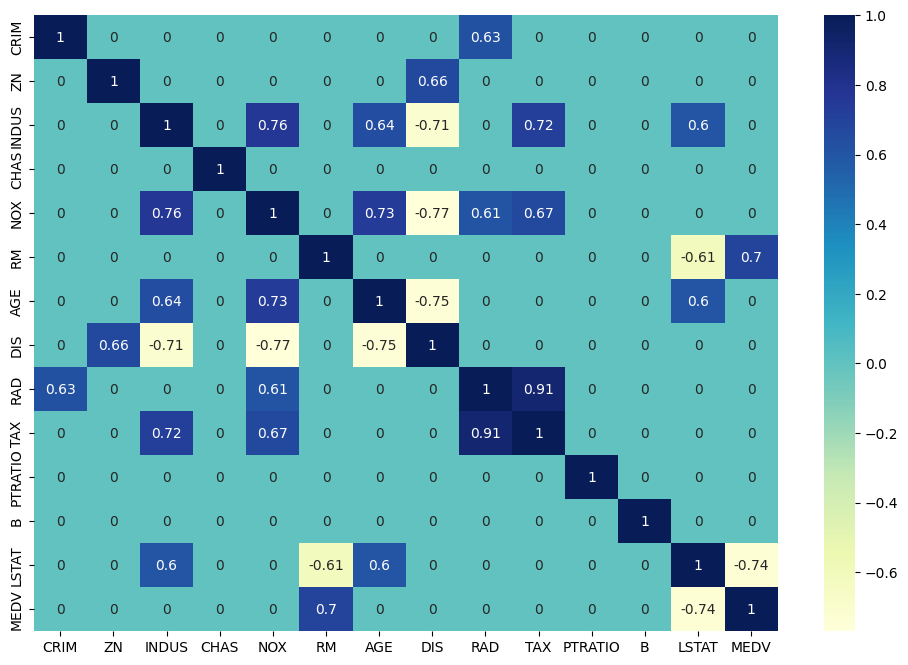

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

## Detecting Collinearity with Eigenvectors

Otro método para identificar que tanto están relacionadas dos variables es mediante los valores y vectores propios. 

In [54]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [55]:
pd.options.display.float_format = '{:,.4f}'.format
pd.Series(eigenvalues).sort_values()

8    0.0603
9    0.1340
12   0.1830
13   0.2128
11   0.2523
10   0.2773
7    0.4031
6    0.5354
5    0.6600
4    0.8509
3    0.8865
2    1.3489
1    1.6495
0    6.5460
dtype: float64

Note that index 8, eigenvalue of 0.0635, is near to zero or very small compared to the others. Small value represents presence of collinearity. 

In [56]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.6988
8    0.6350
2    0.2355
13   0.1341
1    0.0963
4    0.0876
12   0.0831
0    0.0591
10   0.0557
7    0.0471
6    0.0382
3    0.0235
11   0.0162
5    0.0072
dtype: float64

Note that index 9, 8, 2 have very high loading when compared against the rest

In [57]:
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


These are the factors that are causing multicollinearity problem.

***

# Revisiting Feature Importance and Extractions

Check:

1. Direction of the coefficient
2. Impact of the variable / factor on the model

In [58]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0000,2.3100,0,0.5380,6.5750,65.2000,4.0900,1,296.0000,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0,0.4690,6.4210,78.9000,4.9671,2,242.0000,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0,0.4690,7.1850,61.1000,4.9671,2,242.0000,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0,0.4580,6.9980,45.8000,6.0622,3,222.0000,18.7000,394.6300,2.9400,33.4000
4,0.0691,0.0000,2.1800,0,0.4580,7.1470,54.2000,6.0622,3,222.0000,18.7000,396.9000,5.3300,36.2000


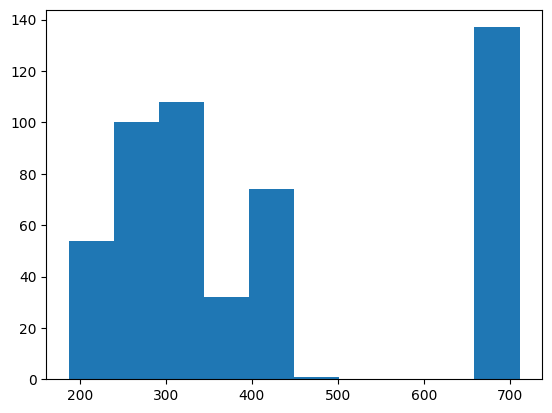

In [59]:
plt.hist(df['TAX']);

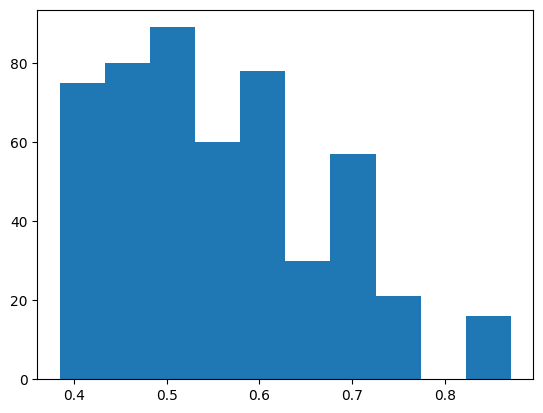

In [60]:
plt.hist(df['NOX']);

## Standardise Variable to Identify Key Feature(s)

In order to perform point 2 properly, one needs to standardise the variable

Mediante la estandarización de datos podemos observar e interpretar más facilmente los datos.

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model = LinearRegression()

In [63]:
model.fit(X,y)

LinearRegression()

In [64]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
CRIM,"[3.163938603494594e-16, 1.1102230246251565e-16..."


In [66]:
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline  
scaler = StandardScaler()  
standard_coefficient_linear_reg = make_pipeline(scaler, model)

In [67]:
standard_coefficient_linear_reg.fit(X,y)
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_, df.columns)), 
                      columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
CRIM,"[3.3713653851678884e-15, 8.881784197001252e-16..."


# Use $R^2$ to Identify Key Features

* Compare $R^2$ of model against $R^2$ of model without a feature. 

* A significant change in $R^2$ signify the importance of the feature.




Para identificar que variables impactan más o consideran mayor variabilidad podemos utilizar el R2 como referencia. 

In [68]:
from sklearn.metrics import r2_score

Este es el coeficiente con todas las variables.

In [69]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.7406426641094095

without LSTAT

Si quitamos LSTAT vemos que el ajuste del modleo disminuye, por lo que es una variable importante. 

In [70]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', 
              data=df)
lr_without_LSTAT = linear_reg.fit()
r2_score(y, lr_without_LSTAT.predict(df))

0.6842042799773889

without AGE

En el caso de la edad, al quitarla no tiene impacto en el R2 por lo que no la necesitamos

In [71]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
lr_without_AGE = linear_reg.fit()
r2_score(y, lr_without_AGE.predict(df))

0.7406412165505145

Esto nos puede ayudar a reducir la dimensionalidad del sistema y podemos hacer los cálculos sin requerir tantos recursos computacionales. 

***